In [1]:
#OD: optical density
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import numpy as np
from PIL import Image


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch as patch
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm; import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

D:\Dropbox\Lab\MotorCortex\Multi_Rats
D:\Dropbox\Lab\MotorCortex


In [2]:
erfdn = [
    'Rats/Rat_Astro/',
]
for rfdn in erfdn:
    im = Image.open(rfdn+'Striatum_stitched_0.tif')
    imarray = np.array(im)
    print(imarray.shape)
    print(np.mean(imarray[:,:,0]),np.max(imarray[:,:,0]))
    print(np.mean(imarray[:,:,1]),np.max(imarray[:,:,1]))
    print(np.mean(imarray[:,:,2]),np.max(imarray[:,:,2]))
    imarray[:,:,0]=0;
    imarray[:,:,2]=0;
    im = Image.fromarray(imarray)
    
    im.show()

(1699, 2353, 3)
8.12312409965 69
23.6093314559 237
12.0549949759 153


In [ ]:
fig, ax = plt.subplots()
x = range(300)
ax.imshow(img, extent=[0, 400, 0, 300])


lesion OD: 23.05 intact OD: 48.5 CC OD: 21.52


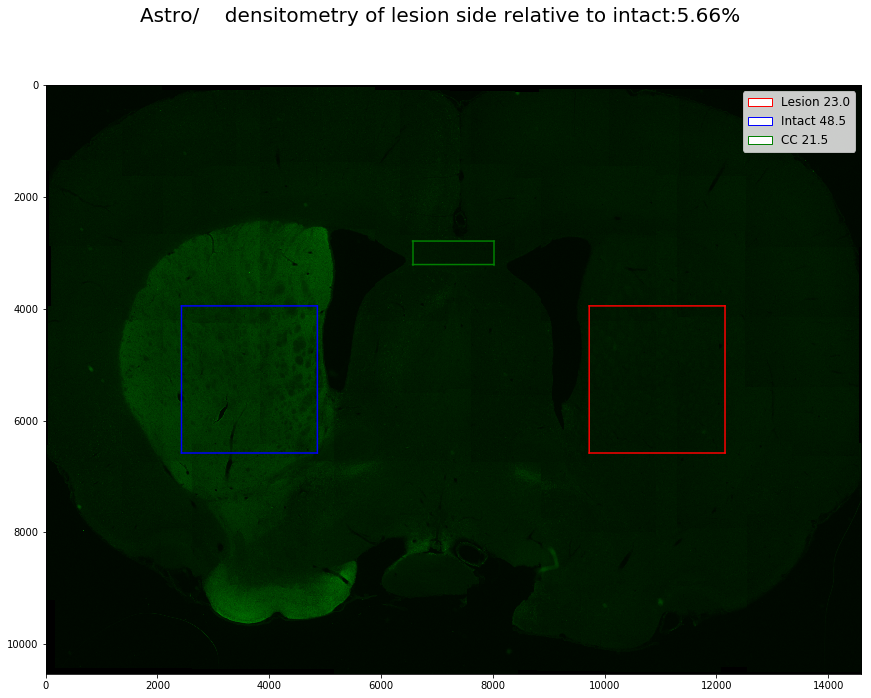

In [28]:
erfdn = [
    'Astro/',
]


j = 0
for rfdn in erfdn:
    
    
    fdn = 'Rats/Rats_information/Histology/Striatum_Patchs/'+rfdn
    im = Image.open(fdn+'img-stitched-0.tif');imarray = np.array(im)
    im_cc = Image.open(fdn+'img-stitched-0_cc.tif');imarray_cc = np.array(im_cc)
    r = imarray.shape[0]; c = imarray.shape[1]
    imarray[:,:,0]=0;     imarray[:,:,2]=0;
    imarray_cc[:,:,0]=0;  imarray_cc[:,:,2]=0;
    
    rs_cc = np.arange(int(3000-r/50), int(3000+r/50)).astype('int')
    cs_cc = np.arange(int(c/2-c/20), int(c/2+c/20)).astype('int')
    imarray_cc = imarray[rs_cc[:,None],cs_cc[None,:],:]
    
    
    rs_i = np.arange(int(r/2-r/8), int(r/2+r/8)).astype('int')
    cs_i = np.arange(int(c/4-c/12), int(c/4+c/12)).astype('int')
    imarray_i = imarray[rs_i[:,None],cs_i[None,:],:]
    rs_l = np.arange(int(r/2-r/8), int(r/2+r/8)).astype('int')
    cs_l = np.arange(int(c/4*3-c/12), int(c/4*3+c/12)).astype('int')
    imarray_l = imarray[rs_l[:,None],cs_l[None,:],:]
    
    

    od_l  = np.mean(imarray_l[:,:,1])
    od_cc = np.mean(imarray_cc[:,:,1])
    od_i  = np.mean(imarray_i[:,:,1])
    print('lesion OD:', np.round(od_l,2),'intact OD:', np.round(od_i,2),'CC OD:', np.round(od_cc,2))
    
    fig = plt.figure(1, figsize=(15,15/c*r)); gs = GridSpec(1,1);
    ax_idx = gs[0,0];       ax = fig.add_subplot(ax_idx);
    ax.imshow(imarray)
    ax.plot(cs_l[0] *np.ones(len(rs_l)),rs_l,'r')
    ax.plot(cs_l[-1]*np.ones(len(rs_l)),rs_l,'r')
    ax.plot(cs_l,   rs_l[0] *np.ones(len(cs_l)),'r')
    ax.plot(cs_l,   rs_l[-1]*np.ones(len(cs_l)),'r')
    
    ax.plot(cs_i[0] *np.ones(len(rs_i)),rs_i,'b')
    ax.plot(cs_i[-1]*np.ones(len(rs_i)),rs_i,'b')
    ax.plot(cs_i,  rs_i[0] *np.ones(len(cs_i)),'b')
    ax.plot(cs_i,  rs_i[-1]*np.ones(len(cs_i)),'b')
    
    ax.plot(cs_cc[0] *np.ones(len(rs_cc)),rs_cc,'g')
    ax.plot(cs_cc[-1]*np.ones(len(rs_cc)),rs_cc,'g')
    ax.plot(cs_cc,  rs_cc[0] *np.ones(len(cs_cc)),'g')
    ax.plot(cs_cc,  rs_cc[-1]*np.ones(len(cs_cc)),'g')

    dm = (od_l-od_cc)/(od_i-od_cc)
    fig.suptitle(rfdn+'    densitometry of lesion side relative to intact:'+str(np.round(dm*100,2))+'%', fontsize=20)


    l_patch  = patch(facecolor='white', edgecolor='r',label='Lesion'+' '+str(np.round(od_l,1)))
    i_patch  = patch(facecolor='white', edgecolor='b',label='Intact'+' '+str(np.round(od_i,1)))
    cc_patch = patch(facecolor='white', edgecolor='g',label='CC'    +' '+str(np.round(od_cc,1)))
    ax.legend(handles=[l_patch,i_patch, cc_patch], loc='upper right', fontsize=12)
